# Question 1


In [ ]:
import numpy as np
import matplotlib
import torch
import autograd.numpy

# Source: Tom Roth - "Building a Computational Graph" Parts 1, 2, and 3

In [ ]:
# Write in function with 5 variables: a, b, c, d, e

def f(a, b, c, d, e): return (1)/((1+(a**b + c**d)*e)**2)

In [ ]:
# Break expression down with numpy operator overloading

def f22(a, b, c, d, e): return np.reciprocal(np.power
      (2,np.add(1,np.multiply(e,np.add(np.power(a,b))(np.power(c,d))))))

In [ ]:
# Each intermediate value stores the result of the operation with the previous one
# Write out these primitives

def f33(a, b, c, d, e):
  t1 = np.power(c, d)
  t2 = np.power(a, b)
  t3 = np.add(t1, t2)
  t4 = np.multiply(e, t3)
  t5 = np.add(1, t4)
  t6 = np.power(2, t5)
  y = np.reciprocal(t6)
  return y

In [ ]:
# Construct Node Class

class Node:
    """A node in a computation graph."""
    def __init__(self, value, fun, parents):
        self.parents = parents
        self.value = value
        self.fun = fun 

In [ ]:
# Build computational graph
# Provide inputs wherein (a, b, c, d, e) = (1, 1, 1, 1, 1)

# Will receive output of 0.111
# This computational graph is resilient to any changes in variables (a, b, c, d, e)

val_a = 1
val_b = 1
val_c = 1
val_d = 1
val_e = 1
a = Node(val_a, None, [])
b = Node(val_b, None, [])
c = Node(val_c, None, [])
d = Node(val_d, None, [])
e = Node(val_e, None, [])

val_t1 = np.power(val_c, val_d)
t1 = Node(val_t1,np.power, [c,d])
val_t2 = np.power(val_a, val_b)
t2 = Node(val_t2,np.power, [a,b])
val_t3 = np.add(val_t1, val_t2)
t3 = Node(val_t3, np.add, [t1,t2])
val_t4 = np.multiply(val_e, val_t3)
t4 = Node(val_t4, np.multiply, [e,t3])
val_t5 = np.add(val_t4, 1)
t5 = Node(val_t5, np.add, [t4,1])
val_t6 = np.power(val_t5, 2)
t6 = Node(val_t6, np.power, [t5,2])
val_y = np.divide(1, val_t6)
y = Node(val_y, np.divide, [1,t6])

print(round(y.value,3))

0.111


# Question 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [ ]:
## 1. Write a function to compute the mean squared error between a prediction and ground truth assuming both are numpy arrays (see python module numpy).

size=10
actuals=np.random.uniform(low=0, high=1, size=(size,))
predictions=np.random.uniform(low=0, high=1, size=(size,))
def mse(actuals,predictions):
  error=0
  for i in range(len(actuals)):
    squared_error=(actuals[i]-predictions[i])**2

  MSE=squared_error/size
  return(MSE)

mse(actuals,predictions)

0.004555225937913399

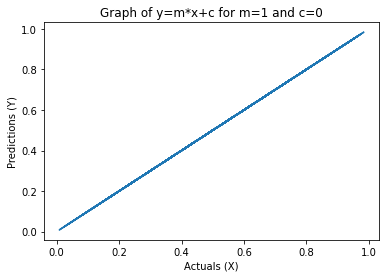

In [ ]:
## 2. Consider a model: 𝑦=𝑚𝑥+𝑐, where the model parameter 𝑚=1 and parameter 𝑐=0 and 𝑥∈(0,1). Plot the function using matplotlib.

## https://matplotlib.org/stable/tutorials/introductory/pyplot.html

X = np.random.uniform(low=0, high=1, size=(100,))
m=1
c=0
Y=m*X+c
plt.plot(X,Y,label='y=1*x+0')
plt.title('Graph of y=m*x+c for m=1 and c=0')
plt.xlabel('Actuals (X)')
plt.ylabel('Predictions (Y)')
plt.show()

In [ ]:
## 3. Generate example data by drawing 𝑁=100 uniform values from the range in which 𝑥 lies, and compute the corresponding 𝑦 to get {𝑥𝑖,𝑦𝑖} 𝑖=1 to N
X=np.random.uniform(low=0, high=1, size=(100,))
m=1
c=0

Y=m*X+c
a=dict(zip(X,Y))



In [ ]:
# ## 4. Assuming that you do not know the model parameters, use backpropagation and gradient descent updates to find the model parameters (choose an appropriate learning rate). The loss function will be the mean squared error.

X=np.random.uniform(low=0, high=1, size=(100,))
Y=1*X+0

learningRate1=1e-3

num_update=10
update=np.arange(num_update)

c_gradient = 0
m_gradient = 0
m_current = np.random.random()
c_current = np.random.random()

error =  mse(Y, X*m_current + c_current)
print("Initial m: "+str(m_current)+", c: "+str(c_current)+", MSE: "+str(error))

print("\n LR: "+str(learningRate1))
for upd in range(num_update): 
  for i in range(len(X)):
    x = X[i]
    y = Y[i]
    c_gradient += -(2/X.shape[0]) * (y - ((m_current * x) + c_current))
    m_gradient += -(2/X.shape[0]) * x * (y - ((m_current * x) + c_current))
  c_current = c_current - (learningRate1 * c_gradient)
  m_current = m_current - (learningRate1 * m_gradient)
  error =  mse(Y, X*m_current + c_current)
  print("Update "+str(upd+1)+": m: "+str(m_current)+", c:"+str(c_current)+", MSE: "+str(error))


Initial m: 0.06857889803267225, c: 0.044132515280236206, MSE: 0.07318492447357537

 LR: 0.001
Update 1: m: 0.0690905328824875, c:0.0449071518864198, MSE: 0.07296799840260426
Update 2: m: 0.07011278142844166, c:0.04645440182885242, MSE: 0.07253562480584824
Update 3: m: 0.0716436038433616, c:0.04877022356023788, MSE: 0.07189074808339127
Update 4: m: 0.07367994658083997, c:0.05184856722878142, MSE: 0.0710377532282861
Update 5: m: 0.07621774979140263, c:0.055681389606807304, MSE: 0.06998242822913629
Update 6: m: 0.0792519571823513, c:0.060258673938403076, MSE: 0.06873191448856544
Update 7: m: 0.08277652829704508, c:0.06556845465726084, MSE: 0.06729464572078472
Update 8: m: 0.08678445318343708, c:0.0715968469139037, MSE: 0.06568027589883677
Update 9: m: 0.09126776941580977, c:0.07832808083965363, MSE: 0.06389959692395833
Update 10: m: 0.09621758142786842, c:0.08574454046304324, MSE: 0.06196444678488342


Initial m: 0.018477974851459078, c: 0.3931629361408838, MSE: 0.005072348876999611

 LR: 0.001
Update 1: m: 0.01869448177019855, c:0.3932775846638978, MSE: 0.005061046814632703
Update 2: m: 0.01912726300196257, c:0.39350645367338616, MSE: 0.005038506301319611
Update 3: m: 0.019775853865067687, c:0.39384868816586, MSE: 0.005004854065019593
Update 4: m: 0.02063955866006122, c:0.39430300830743603, MSE: 0.004960278964892027
Update 5: m: 0.021717452253789772, c:0.39486771263211207, MSE: 0.004905030524311743
Update 6: m: 0.023008382185469252, c:0.3955406822939119, MSE: 0.004839416995348932
Update 7: m: 0.024510971289614276, c:0.3963193863624626, MSE: 0.004763802972001079
Update 8: m: 0.026223620829422915, c:0.39720088814900484, MSE: 0.004678606573477801
Update 9: m: 0.028144514132966657, c:0.39818185254730876, MSE: 0.0045842962226513686
Update 10: m: 0.030271620723307986, c:0.3992585543714747, MSE: 0.004481387048360477

 LR: 0.0001
Update 1: m: 0.018499625543333027, c:0.39317440099318524, MSE

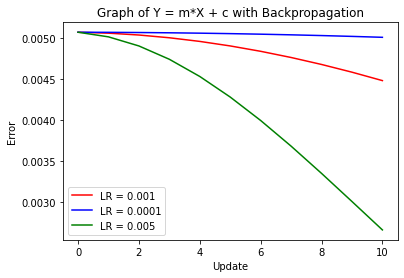

In [ ]:
## 5. Plot the error in the estimates as a function of the number of iterations of gradient update. Change the learning rate and plot another curve on the previous plot. 
# Plot 1

X=np.random.uniform(low=0, high=1, size=(100,))
Y=1*X+0

learningRate1=0.001
learningRate2=0.0001
learningRate3=0.005
num_update=10
update=np.arange(num_update)


c_gradient = 0
m_gradient = 0
m_current = np.random.random()
c_current = np.random.random()

error =  mse(Y, X*m_current + c_current)
print("Initial m: "+str(m_current)+", c: "+str(c_current)+", MSE: "+str(error))



def upd1(X,Y,m_current,m_gradient,c_current,c_gradient,learningRate1,num_update,error):
  e_list=[]
  e_list.append(error)
  print("\n LR: "+str(learningRate1))
  for upd in range(num_update): 
    for i in range(len(X)):
      x = X[i]
      y = Y[i]
      c_gradient += -(2/X.shape[0]) * (y - ((m_current * x) + c_current))
      m_gradient += -(2/X.shape[0]) * x * (y - ((m_current * x) + c_current))
    c_current = c_current - (learningRate1 * c_gradient)
    m_current = m_current - (learningRate1 * m_gradient)
    error =  mse(Y, X*m_current + c_current)
    e_list.append(error)
    print("Update "+str(upd+1)+": m: "+str(m_current)+", c:"+str(c_current)+", MSE: "+str(error))
  return e_list

e_list1=upd1(X,Y,m_current,m_gradient,c_current,c_gradient,learningRate1,num_update,error)
e_list2=upd1(X,Y,m_current,m_gradient,c_current,c_gradient,learningRate2,num_update,error)
e_list3=upd1(X,Y,m_current,m_gradient,c_current,c_gradient,learningRate3,num_update,error)


update = np.insert(update, 0, -1)
update=update+1

print("\n\n")
plt.plot(update,e_list1,"red",label='LR = 0.001')
plt.plot(update,e_list2,"blue",label='LR = 0.0001')
plt.plot(update,e_list3,"green",label='LR = 0.005')
plt.title('Graph of Y = m*X + c with Backpropagation')
plt.xlabel('Update')
plt.ylabel('Error')
plt.legend()
plt.show()

Initial m1: 0.7622239345910186, m2: 0.9369981181174618, c: 0.9495546863660729, MSE: 0.03232781191664244

 LR: 0.001
Update 1: m1: 0.7625273714371792,m2: 0.9371297426446081,c:0.9505580347587549, MSE: 0.03219086752729931
Update 2: m1: 0.7631328941946304,m2: 0.9373920194469537,c:0.9525623097826483, MSE: 0.03191823884838183
Update 3: m1: 0.7640378050828897,m2: 0.937783007028765,c:0.955562674889905, MSE: 0.0315124325517677
Update 4: m1: 0.7652380676423348,m2: 0.9382998006579695,c:0.9595518926760348, MSE: 0.030977174979419524
Update 5: m1: 0.7667283189538426,m2: 0.9389385413551633,c:0.9645203457234435, MSE: 0.030317372171816088
Update 6: m1: 0.7685018858756084,m2: 0.9396944278376602,c:0.9704560642976618, MSE: 0.029539057279651865
Update 7: m1: 0.7705508052493292,m2: 0.9405617313833398,c:0.977344760815065, MSE: 0.028649325954376657
Update 8: m1: 0.7728658480162459,m2: 0.9415338135704392,c:0.985169870981027, MSE: 0.027656260449012638
Update 9: m1: 0.7754365471720222,m2: 0.9426031468409465,c:0.

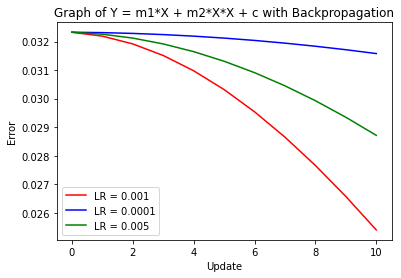

In [ ]:
## 6. Do steps 3-5 when the model is 𝑦=𝑚1𝑥+𝑚2𝑥2+𝑐 and the true parameters are 𝑚1=0.5, 𝑚2=1 and 𝑐=1. And 𝑥∈(0,1). Also, plot the ground truth function (i.e., with the true values of 𝑚1,𝑚2 and 𝑐). 
#Compare and contrast the plot with the previous one.

X=np.random.uniform(low=0, high=1, size=(100,))
m1=0.5
m2=1
c=1

Y=m1*X + m2*x*x + c
a=dict(zip(X,Y))

learningRate1=0.001
learningRate2=0.0001
learningRate3=0.0005
num_update=10
update=np.arange(num_update)

c_gradient = 0
m1_gradient = 0
m2_gradient = 0
c_current = np.random.random()
m1_current = np.random.random()
m2_current = np.random.random()

error =  mse(Y, X*m1_current + X*X*m2_current + c_current)
print("Initial m1: "+str(m1_current)+", m2: "+str(m2_current)+", c: "+str(c_current)+", MSE: "+str(error))

def upd2(X,Y,num_update,m1_current,m2_current,c_current,learningRate1,c_gradient, m1_gradient,m2_gradient,error):
  e_list=[]
  e_list.append(error)
  print("\n LR: "+str(learningRate1))
  for upd in range(num_update): 
    for i in range(len(X)):
      x = X[i]
      y = Y[i]
      c_gradient += -(2/X.shape[0]) * (y - ((m1_current * x) + (m2_current * x * x) + c_current))
      m1_gradient += -(2/X.shape[0]) * x * (y - ((m1_current * x) + (m2_current * x * x) + c_current))
      m2_gradient += -(2/X.shape[0]) * x * x * (y - ((m1_current * x) + (m2_current * x * x) + c_current))
    c_current = c_current - (learningRate1 * c_gradient)
    m1_current = m1_current - (learningRate1 * m1_gradient)
    m2_current = m2_current - (learningRate1 * m2_gradient)
    error =  mse(Y, X*m1_current + X*X*m2_current + c_current)
    e_list.append(error)
    print("Update "+str(upd+1)+": m1: "+str(m1_current)+",m2: "+str(m2_current) + ",c:"+str(c_current)+", MSE: "+str(error))
  return e_list

e_list1=upd2(X,Y,num_update,m1_current,m2_current,c_current,learningRate1,c_gradient, m1_gradient,m2_gradient,error)
e_list2=upd2(X,Y,num_update,m1_current,m2_current,c_current,learningRate2,c_gradient, m1_gradient,m2_gradient,error)
e_list3=upd2(X,Y,num_update,m1_current,m2_current,c_current,learningRate3,c_gradient, m1_gradient,m2_gradient,error)


update = np.insert(update, 0, -1)
update=update+1

print("\n\n")
plt.plot(update,e_list1,"red",label='LR = 0.001')
plt.plot(update,e_list2,"blue",label='LR = 0.0001')
plt.plot(update,e_list3,"green",label='LR = 0.005')
plt.title('Graph of Y = m1*X + m2*X*X + c with Backpropagation')
plt.xlabel('Update')
plt.ylabel('Error')
plt.legend()
plt.show()


Initial m: 0.6915075931493916, c: 0.24068622385952976, MSE: 0.002119916155912338

 LR: 0.001
Update 1: m: 0.6919123530909186, c:0.24132073340362487, MSE: 0.0021101179401234035
Update 2: m: 0.6927211151104136, c:0.24258882690481595, MSE: 0.002090667104884742
Update 3: m: 0.6939323686169205, c:0.2444886582185058, MSE: 0.002061851026152383
Update 4: m: 0.6955438604980465, c:0.24701747064761406, MSE: 0.0020240913717198567
Update 5: m: 0.6975526102642426, c:0.2501716118168754, MSE: 0.001977933226461488
Update 6: m: 0.6999549299373085, c:0.25394655325861826, MSE: 0.0019240312390187478
Update 7: m: 0.7027464484300541, c:0.25833691450362717, MSE: 0.0018631333026305143
Update 8: m: 0.7059221401098517, c:0.26333649142523635, MSE: 0.00179606236222316
Update 9: m: 0.7094763571903501, c:0.26893828854329066, MSE: 0.0017236969910803628
Update 10: m: 0.7134028655537823, c:0.2751345549576882, MSE: 0.0016469514016974542

 LR: 0.0001
Update 1: m: 0.6915480691435443, c:0.24074967481393927, MSE: 0.00211893

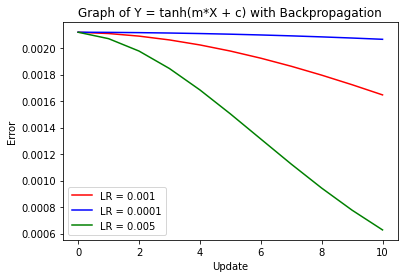

In [ ]:
## 7. Do steps 3-5 when the model is 𝑦=tanh(𝑚∗𝑥+𝑐) and the true parameters are 𝑚=1 and 𝑐=2. And 𝑥∈(0,2). Also, plot the ground truth function.

X=np.random.uniform(low=0, high=2, size=(100,))
m=1
c=2

Y = np.tanh(1*X + 2)
a=dict(zip(X,Y))



learningRate1=0.001
learningRate2=0.0001
learningRate3=0.005
num_update=10
update=np.arange(num_update)


c_gradient = 0
m_gradient = 0
m_current = np.random.random()
c_current = np.random.random()

error =  mse(Y, np.tanh(m_current*X + c_current))
print("Initial m: "+str(m_current)+", c: "+str(c_current)+", MSE: "+str(error))



def upd1(X,Y,m_current,m_gradient,c_current,c_gradient,learningRate1,num_update,error):
  e_list=[]
  e_list.append(error)
  print("\n LR: "+str(learningRate1))
  for upd in range(num_update): 
    for i in range(len(X)):
      x = X[i]
      y = Y[i]
      c_gradient += -(2/X.shape[0]) * (y - np.tanh(m_current*x + c_current))
      m_gradient += -(2/X.shape[0]) * x * (y - np.tanh(m_current*x + c_current))
    c_current = c_current - (learningRate1 * c_gradient)
    m_current = m_current - (learningRate1 * m_gradient)
    error =  mse(Y, np.tanh(m_current*X + c_current))
    e_list.append(error)
    print("Update "+str(upd+1)+": m: "+str(m_current)+", c:"+str(c_current)+", MSE: "+str(error))
  return e_list

e_list1=upd1(X,Y,m_current,m_gradient,c_current,c_gradient,learningRate1,num_update,error)
e_list2=upd1(X,Y,m_current,m_gradient,c_current,c_gradient,learningRate2,num_update,error)
e_list3=upd1(X,Y,m_current,m_gradient,c_current,c_gradient,learningRate3,num_update,error)

update = np.insert(update, 0, -1)
update=update+1

print("\n\n")
plt.plot(update,e_list1,"red",label='LR = 0.001')
plt.plot(update,e_list2,"blue",label='LR = 0.0001')
plt.plot(update,e_list3,"green",label='LR = 0.005')
plt.title('Graph of Y = tanh(m*X + c) with Backpropagation')
plt.xlabel('Update')
plt.ylabel('Error')
plt.legend()
plt.show()

# Question 3

In [ ]:
def logistic_regression_loss (W, b, X, y,lrate=0):
  num_count = y.shape[0]

  # regularization strength #Computing scores and probabilities 
  pred = np.dot (x, W) + b 
  exp_pred = np.exp (pred) 
  probs = exp_pred / np.sum (exp_pred, axis=1, keepdims=True) 

  #average cross-entropy loss and regulariza tion 
  logprobs = -np.log (probs [range (num_count),y]) 
  losss = np.sum (logprobs) /num_count 

  #Regulariza tion loss
  if lrate != 0: 
    L1_loss = (lrate/2) * np.sum (W) 
    L2_loss = (lrate/2) * np.sum (W*W) 
    total_loss = L1_loss + L2_loss + losss 
  else:
    total_loss = losss

  return total_loss


# Question 4

In [ ]:
# Source: ThejaT GitHub Linear Classifier Example & Data Linear Classifier

In [ ]:
##1. Generate data from Data Linear Classifier 

In [ ]:
# Imports

import numpy as np
import pickle

In [ ]:
# Points Per Class
N = 100 

# Dimensions
D = 2 

# Number of Classes
K = 3 

X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # Theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

In [ ]:
pickle.dump(X,open('dataX.pickle', 'wb'))
pickle.dump(y,open('datay.pickle','wb'))

In [ ]:
# Imports for plotting

import matplotlib.pyplot as plt 
np.random.seed(0) 

In [ ]:
# Set Size for Plots

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
# Begin working with data that has been generated

X = pickle.load(open('dataX.pickle','rb'))
y = pickle.load(open('datay.pickle','rb'))

In [ ]:
# Set number of features
D = X.shape[1] 

# Number of classes assuming class index at 0
K = max(y)+1 

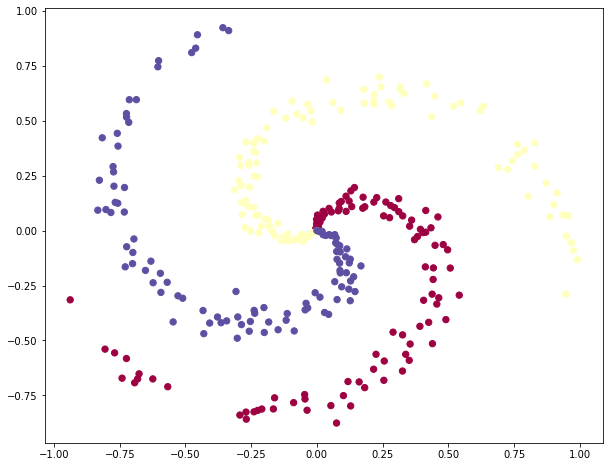

In [ ]:
# Plot generated data

fig = plt.figure() 
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [ ]:
##2. Split the Data into test and train (20/80)

# Imports for split

import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Test size set to .2 for 20%
# We will explore model performance with a different train/test split later in question

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Confirm Split
# 240 training examples (80 percent) & 60 test examples (20 percent)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(240, 2) (240,)
(60, 2) (60,)


In [ ]:
##3. Build a linear classifier assuming the multiclass logistic loss and L2 regularization for the weights only
##3 cont. Report prediction accuracy on the training data and the test data and show appropriate plots

In [ ]:
# Start by initializing parameters randomly 

W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

In [ ]:
# We set an initial regularization strength of 1e-3 but will change this parameter as needed throughout assignment

reg = 1e-3

In [ ]:
# We will set number of examples equal to the number of training points
# We will not alter batch size in this assignment 

num_examples = X_train.shape[0]

In [ ]:
# We set an initial learning rate of 1e-1 but will change this parameter as needed throughout assignment

step_size = 1e-1

In [ ]:
# We set initial number of iterations to 200 but will change this number as needed throughout assignment

for i in range(200):
  
    # Class Scores
    scores = np.dot(X_train, W) + b 
  
    # Class Probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # Multiclass Logistic Loss and Regularization Loss
    corect_logprobs = -np.log(probs[range(num_examples),y_train])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    # Print loss through each 10 iterations
    if i % 10 == 0:
        print("iteration: "+str(i) +" loss: "+str(loss))
  
    # Compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y_train] -= 1
    dscores /= num_examples
  
    # Backpropagate the gradient to our parameters (W,b)
    dW = np.dot(X_train.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    # Regularization Gradient
    dW += reg*W 
  
    # Parameter Update (with learning rate)
    W += -step_size * dW
    b += -step_size * db

In [ ]:
scores[1,]

array([-0.54262063,  0.40605866,  0.14270905])

We report an initial training accuracy of approximately .51 based on the initial parameters of our linear classifier. We will later attempt to customize parameters to improve this training accuracy. 

In [ ]:
scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Training Accuracy: {0}'.format(np.mean(predicted_class == y_train)))

Training Accuracy: 0.5166666666666667


(-1.8755980440759308, 1.9044019559240726)

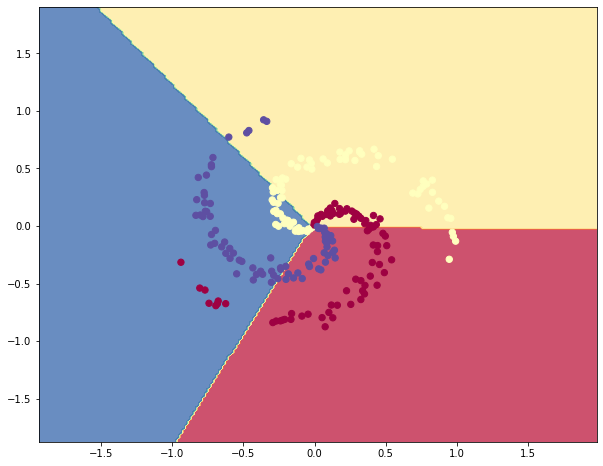

In [ ]:
# Initial plot based on training data

h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

We report an initial test accuracy of approximately 0.45 based on the initial parameters of our linear classifier. Of course, this is quite low given that a random accuracy would be one-third accurate. We will later attempt to customize these parameters to improve this test accuracy. 

---



In [ ]:
scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Test Accuracy: {0}'.format(np.mean(predicted_class == y_test)))

Test Accuracy: 0.45


(-1.8579518721452986, 1.8820481278547048)

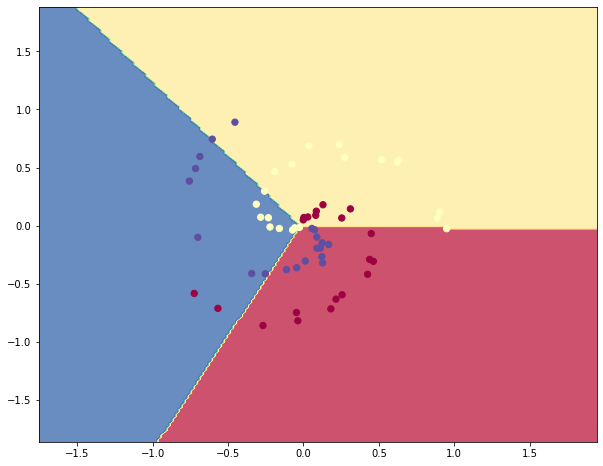

In [ ]:
# Initial Plot Based on Test Data

h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [ ]:
##4. Introduce a cross validation scheme and justify your choice of parameters
##4 cont. What is the validation accuracy compared to the test accuracy?

In [ ]:
# Sources: Jason Brownlee of Machine Learning Mastery, and Lyashenko & Ja of Neptune Blog, and SciKitLearn Tutorial

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
skf.get_n_splits(X, y)

5

In [ ]:
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [ ]:
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train2, X_test2 = X[train_index], X[test_index]
  y_train2, y_test2 = y[train_index], y[test_index]

In [ ]:
X_train2 = X[train_index]
y_train2 = y[train_index]
X_test2 = X[test_index]
y_test2 = y[test_index]

In [ ]:
scores = np.dot(X_train2, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Training Accuracy: {0}'.format(np.mean(predicted_class == y_train2)))

Training Accuracy: 0.4708333333333333


In [ ]:
scores = np.dot(X_test2, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Test Accuracy: {0}'.format(np.mean(predicted_class == y_test2)))

Test Accuracy: 0.6333333333333333


We utilized Stratified K-Fold Cross Validation Method and declared five splits on the data. After splitting data in this manner, we saw a decrease in training accuracy, but an increase in test accuracy, which rose to approximately 0.63 using this method. 

In [ ]:
##5. What is the sensitivity of the model's performance to different learning rates and the number of gradient descent iterations?
# Describe via suitable plots

Through our experimentation, we found that as the number of gradient iterations increased, the model was prone to overfitting. The training accuracy improved, but the test accuracy often did not. 

Ultimately, though, more gradient descent iterations was an optimal decision when using a slower learning rate. If we used a slower learning rate and failed to add iterations, the model would struggle to learn the data. 

Below is an example of the relationship between gradient descent iterations and learning rate. With a slower learning rate of 1e-4, 500 iterations (or fewer) struggles to model the data. However, with 10,000 iterations, the model improves. This is just one example of this relationship.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

In [ ]:
reg = 1e-3

In [ ]:
num_examples = X_train.shape[0]

In [ ]:
# Slower Learning Rate

step_size = 1e-4

In [ ]:
# Fewer Iterations

for i in range(500):
  
    # Class Scores
    scores = np.dot(X_train, W) + b 
  
    # Class Probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # Multiclass Logistic Loss and Regularization Loss
    corect_logprobs = -np.log(probs[range(num_examples),y_train])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    # Print loss through each 10 iterations
    if i % 10 == 0:
        print("iteration: "+str(i) +" loss: "+str(loss))
  
    # Compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y_train] -= 1
    dscores /= num_examples
  
    # Backpropagate the gradient to our parameters (W,b)
    dW = np.dot(X_train.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    # Regularization Gradient
    dW += reg*W 
  
    # Parameter Update (with learning rate)
    W += -step_size * dW
    b += -step_size * db

In [ ]:
scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Training Accuracy: {0}'.format(np.mean(predicted_class == y_train)))

Training Accuracy: 0.42916666666666664


(-1.8755980440759308, 1.9044019559240726)

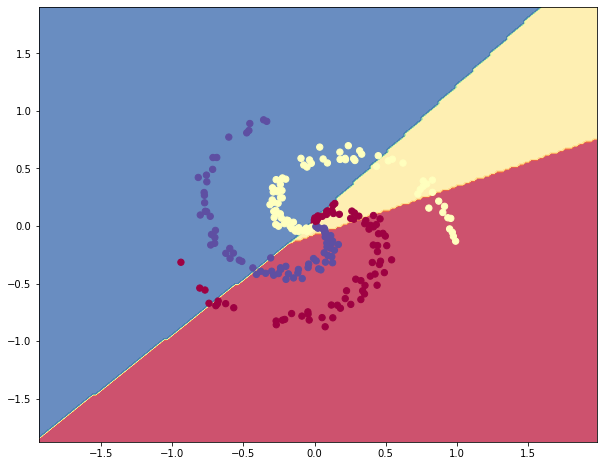

In [ ]:
# Plot based on training data with slower learning rate and too few iterations

h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [ ]:
scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Test Accuracy: {0}'.format(np.mean(predicted_class == y_test)))

Test Accuracy: 0.35


(-1.8392574334736982, 1.740742566526305)

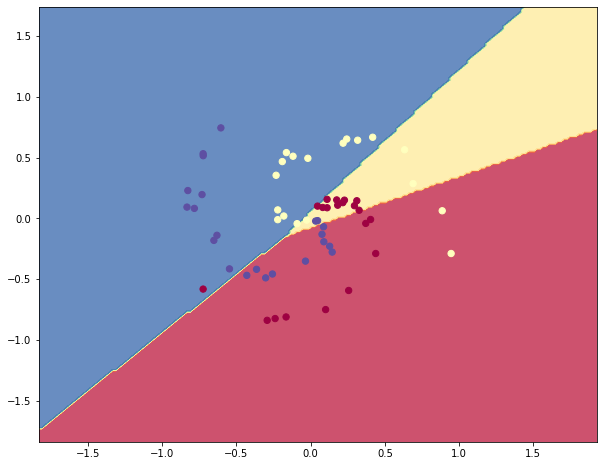

In [ ]:
# Plot based on test data with slower learning rate and too few iterations

h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [ ]:
# Same slow learning rate

step_size = 1e-4

In [ ]:
# But with more iterations
for i in range(10000):
  
    # Class Scores
    scores = np.dot(X_train, W) + b 
  
    # Class Probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # Multiclass Logistic Loss and Regularization Loss
    corect_logprobs = -np.log(probs[range(num_examples),y_train])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    # Print loss through each 10 iterations
    if i % 10 == 0:
        print("iteration: "+str(i) +" loss: "+str(loss))
  
    # Compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y_train] -= 1
    dscores /= num_examples
  
    # Backpropagate the gradient to our parameters (W,b)
    dW = np.dot(X_train.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    # Regularization Gradient
    dW += reg*W 
  
    # Parameter Update (with learning rate)
    W += -step_size * dW
    b += -step_size * db

In [ ]:
scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Training Accuracy: {0}'.format(np.mean(predicted_class == y_train)))

Training Accuracy: 0.5125


(-1.8755980440759308, 1.9044019559240726)

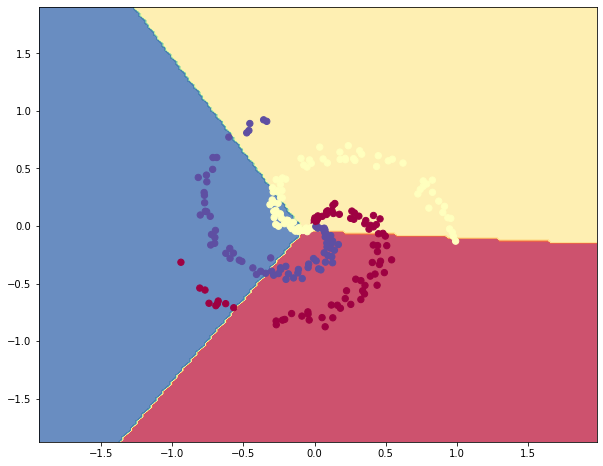

In [ ]:
# Plot based on training data with slower learning but more iterations

h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [ ]:
scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Test Accuracy: {0}'.format(np.mean(predicted_class == y_test)))

Test Accuracy: 0.5166666666666667


(-1.8392574334736982, 1.740742566526305)

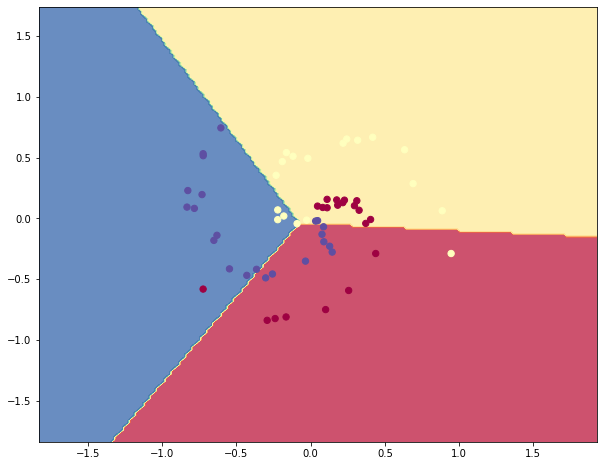

In [ ]:
# Plot based on test data with more iterations

h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [ ]:
##6. What is the sensitivity of the model's performance to different regularization parameter values?
## Find best regularization parameter using an exhaustive search procedure 
# Describe your choice via suitable plots
# What is the performance difference between using regularization and no regularization

Our results indicated improved performance when adjusting the regularization parameter, as opposed to not using regularization. Drawing from our models in Question 5, we conducted an exhaustive search and settled on a regularization parameter that provided us with 55 percent test accuracy among the three classes — still a noted improvement over previous attempts.

In [ ]:
# Adjusted regularization parameter based on exhaustive search

reg = 2e-1

In [ ]:
step_size = 1e-4

In [ ]:
for i in range(10000):
  
    # Class Scores
    scores = np.dot(X_train, W) + b 
  
    # Class Probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # Multiclass Logistic Loss and Regularization Loss
    corect_logprobs = -np.log(probs[range(num_examples),y_train])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    # Print loss through each 10 iterations
    if i % 10 == 0:
        print("iteration: "+str(i) +" loss: "+str(loss))
  
    # Compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y_train] -= 1
    dscores /= num_examples
  
    # Backpropagate the gradient to our parameters (W,b)
    dW = np.dot(X_train.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    # Regularization Gradient
    dW += reg*W 
  
    # Parameter Update (with learning rate)
    W += -step_size * dW
    b += -step_size * db

In [ ]:
scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Training Accuracy: {0}'.format(np.mean(predicted_class == y_train)))

Training Accuracy: 0.5166666666666667


(-1.8755980440759308, 1.9044019559240726)

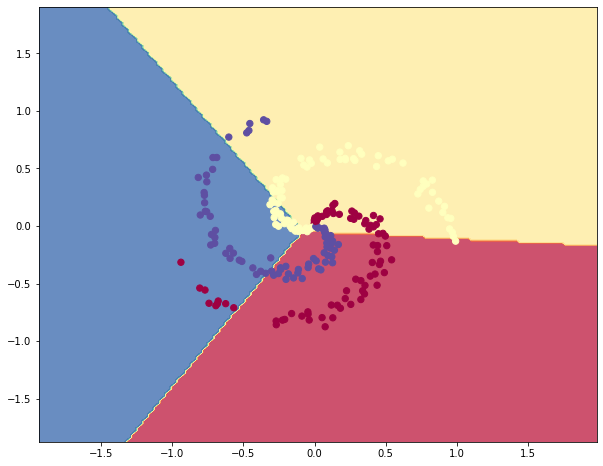

In [ ]:
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [ ]:
scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Test Accuracy: {0}'.format(np.mean(predicted_class == y_test)))

Test Accuracy: 0.5


(-1.8392574334736982, 1.740742566526305)

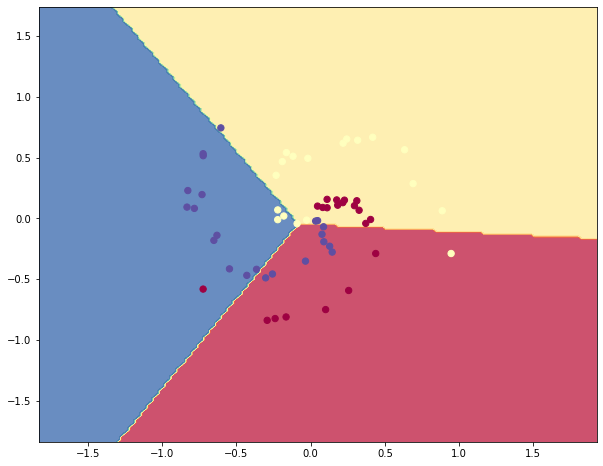

In [ ]:
# This test struggles with identifying one class, but overall it's an improvement

h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [ ]:
##7. What is the sensitivity of the model's performance with respect to a different train/test split (50/50)
# Split into 50/50

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.5)

In a sort of plot twist, the above model fit best for training accuracy (0.66) after changing the train/test split and was roughly on par with other outcomes when it came to training accuracy (0.54). 

This is a good example of how the number of examples can greatly influence the outcome of a model.  

In [ ]:
X_train3.shape

(150, 2)

In [ ]:
num_examples = X_train3.shape[0]

In [ ]:
X_test3.shape

(150, 2)

In [ ]:
for i in range(10000):
  
    # Class Scores
    scores = np.dot(X_train3, W) + b 
  
    # Class Probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # Multiclass Logistic Loss and Regularization Loss
    corect_logprobs = -np.log(probs[range(num_examples),y_train3])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    # Print loss through each 10 iterations
    if i % 10 == 0:
        print("iteration: "+str(i) +" loss: "+str(loss))
  
    # Compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y_train3] -= 1
    dscores /= num_examples
  
    # Backpropagate the gradient to our parameters (W,b)
    dW = np.dot(X_train3.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    # Regularization Gradient
    dW += reg*W 
  
    # Parameter Update (with learning rate)
    W += -step_size * dW
    b += -step_size * db

In [ ]:
scores = np.dot(X_train3, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Training Accuracy: {0}'.format(np.mean(predicted_class == y_train3)))

Training Accuracy: 0.6666666666666666


(-1.8755980440759308, 1.9044019559240726)

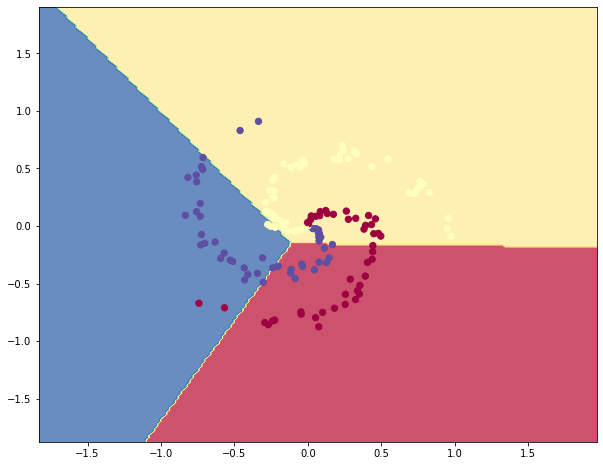

In [ ]:
h = 0.02
x_min, x_max = X_train3[:, 0].min() - 1, X_train3[:, 0].max() + 1
y_min, y_max = X_train3[:, 1].min() - 1, X_train3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=y_train3, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [ ]:
scores = np.dot(X_test3, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Test Accuracy: {0}'.format(np.mean(predicted_class == y_test3)))

Test Accuracy: 0.54


(-1.8257903437299143, 1.914209656270089)

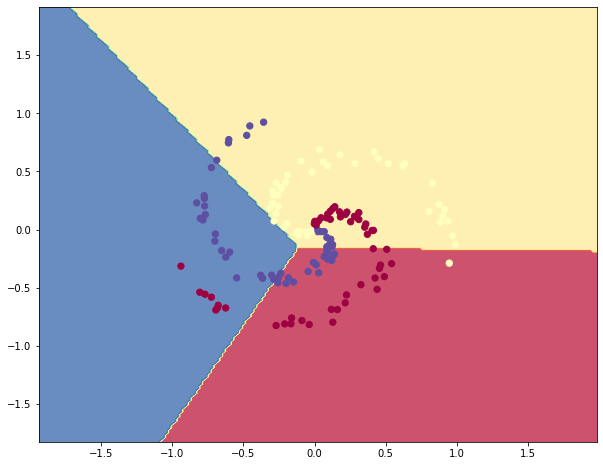

In [ ]:
h = 0.02
x_min, x_max = X_test3[:, 0].min() - 1, X_test3[:, 0].max() + 1
y_min, y_max = X_test3[:, 1].min() - 1, X_test3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_test3[:, 0], X_test3[:, 1], c=y_test3, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Question 5

In [ ]:
# https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
# https://keras.io/guides/functional_api/

In [ ]:
import numpy as np
import tensorflow as tf

import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import  Flatten, Input, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

from matplotlib import pyplot


In [ ]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)
trainn = trainX / 255.0
testn = testX / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
def moddel (act1,act2,opt,losss,metricss,batchsize,epochhs,splitsize,hiddn):
  inputs = keras.Input(shape=(28, 28, 1))
  dense = Dense(hiddn, activation=act1)
  x = dense(inputs)
  x = Flatten()(x)
  outputs = Dense(10, activation=act2)(x)

  model = Model(inputs=inputs, outputs=outputs, name="mnist_model")

  model.compile(optimizer=opt, loss=losss, metrics=[metricss])
  history = model.fit(trainX, trainY, batch_size=batchsize, epochs=epochhs, validation_split=splitsize)

  return model, history



In [ ]:
# model=moddel(act1,act2,opt,losss,metricss,batchsize,epochhs,splitsize)
opt = SGD(learning_rate=0.005, momentum=0.9)
model,history=moddel('relu','relu',opt,'categorical_crossentropy','accuracy',128,2,0.2,128)
model.summary()
test_scores = model.evaluate(testX, testY, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
375/375 [==============================] - 61s 161ms/step - loss: 4.9830 - accuracy: 0.0992 - val_loss: 3.8601 - val_accuracy: 0.1030
Epoch 2/2
375/375 [==============================] - 50s 135ms/step - loss: 3.7182 - accuracy: 0.0993 - val_loss: 3.5365 - val_accuracy: 0.1030
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense (Dense)               (None, 28, 28, 128)       256       
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 10)                1003530   
                                                                 
Total params: 1,003,786
Trainab

In [ ]:
# model=moddel(act1,act2,opt,losss,metricss,batchsize,epochhs,splitsize)
opt = SGD(learning_rate=0.01, momentum=0.9)
model,history=moddel('relu','relu',opt,'categorical_crossentropy','accuracy',128,2,0.2,128)
model.summary()
test_scores = model.evaluate(testX, testY, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
375/375 [==============================] - 51s 136ms/step - loss: nan - accuracy: 0.1522 - val_loss: nan - val_accuracy: 0.1030
Epoch 2/2
375/375 [==============================] - 49s 130ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense_2 (Dense)             (None, 28, 28, 128)       256       
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 10)                1003530   
                                                                 
Total params: 1,003,786
Trainable params: 1

In [ ]:
# model=moddel(act1,act2,opt,losss,metricss,batchsize,epochhs,splitsize)
opt = SGD(learning_rate=0.005, momentum=0.9)
model,history=moddel('relu','relu',opt,'categorical_crossentropy','accuracy',128,2,0.2,8)
model.summary()
test_scores = model.evaluate(testX, testY, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
375/375 [==============================] - 5s 13ms/step - loss: 2.1949 - accuracy: 0.1595 - val_loss: 2.0405 - val_accuracy: 0.0957
Epoch 2/2
375/375 [==============================] - 4s 12ms/step - loss: 1.8307 - accuracy: 0.1040 - val_loss: 1.6521 - val_accuracy: 0.1324
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense_4 (Dense)             (None, 28, 28, 8)         16        
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                62730     
                                                                 
Total params: 62,746
Trainable para

In [ ]:
# model=moddel(act1,act2,opt,losss,metricss,batchsize,epochhs,splitsize)
opt = SGD(learning_rate=0.01, momentum=0.9)
model,history=moddel('relu','relu',opt,'categorical_crossentropy','accuracy',128,2,0.2,8)
model.summary()
test_scores = model.evaluate(testX, testY, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
375/375 [==============================] - 5s 12ms/step - loss: 7.4198 - accuracy: 0.1065 - val_loss: 7.2965 - val_accuracy: 0.1287
Epoch 2/2
375/375 [==============================] - 4s 11ms/step - loss: 7.1864 - accuracy: 0.2210 - val_loss: 7.0781 - val_accuracy: 0.2853
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense_6 (Dense)             (None, 28, 28, 8)         16        
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_7 (Dense)             (None, 10)                62730     
                                                                 
Total params: 62,746
Trainable para

In [ ]:
# model=moddel(act1,act2,opt,losss,metricss,batchsize,epochhs,splitsize)
opt = SGD(learning_rate=0.01, momentum=0.9)
model,history=moddel('relu','relu','adadelta','categorical_crossentropy','accuracy',128,2,0.2,128)
model.summary()
test_scores = model.evaluate(testX, testY, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
375/375 [==============================] - 51s 135ms/step - loss: nan - accuracy: 0.1375 - val_loss: nan - val_accuracy: 0.1030
Epoch 2/2
375/375 [==============================] - 50s 133ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense_8 (Dense)             (None, 28, 28, 128)       256       
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_9 (Dense)             (None, 10)                1003530   
                                                                 
Total params: 1,003,786
Trainable params: 1

In [ ]:
# model=moddel(act1,act2,opt,losss,metricss,batchsize,epochhs,splitsize)
opt = SGD(learning_rate=0.01, momentum=0.9)
model,history=moddel('relu','relu','adadelta','categorical_crossentropy','accuracy',128,2,0.2,8)
model.summary()
test_scores = model.evaluate(testX, testY, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
375/375 [==============================] - 5s 11ms/step - loss: nan - accuracy: 0.1830 - val_loss: nan - val_accuracy: 0.1030
Epoch 2/2
375/375 [==============================] - 4s 11ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense_10 (Dense)            (None, 28, 28, 8)         16        
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_11 (Dense)            (None, 10)                62730     
                                                                 
Total params: 62,746
Trainable params: 62,746
N

In [ ]:
# model=moddel(act1,act2,opt,losss,metricss,batchsize,epochhs,splitsize)
opt = SGD(learning_rate=0.005, momentum=0.9)
model,history=moddel('LeakyReLU','LeakyReLU',opt,'categorical_crossentropy','accuracy',128,2,0.2,128)
model.summary()
test_scores = model.evaluate(testX, testY, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
375/375 [==============================] - 58s 153ms/step - loss: 3.4572 - accuracy: 0.1135 - val_loss: 2.1940 - val_accuracy: 0.0011
Epoch 2/2
375/375 [==============================] - 58s 154ms/step - loss: 5.1344 - accuracy: 0.0311 - val_loss: 3.5839 - val_accuracy: 0.0984
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense_12 (Dense)            (None, 28, 28, 128)       256       
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_13 (Dense)            (None, 10)                1003530   
                                                                 
Total params: 1,003,786
Trainab

In [ ]:
# model=moddel(act1,act2,opt,losss,metricss,batchsize,epochhs,splitsize)
opt = SGD(learning_rate=0.01, momentum=0.9)
model,history=moddel('LeakyReLU','LeakyReLU',opt,'categorical_crossentropy','accuracy',128,2,0.2,128)
model.summary()
test_scores = model.evaluate(testX, testY, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
375/375 [==============================] - 58s 154ms/step - loss: 7.5612 - accuracy: 0.1365 - val_loss: 8.0968 - val_accuracy: 0.1005
Epoch 2/2
375/375 [==============================] - 56s 150ms/step - loss: 8.8863 - accuracy: 0.0999 - val_loss: 9.2029 - val_accuracy: 0.1005
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense_14 (Dense)            (None, 28, 28, 128)       256       
                                                                 
 flatten_7 (Flatten)         (None, 100352)            0         
                                                                 
 dense_15 (Dense)            (None, 10)                1003530   
                                                                 
Total params: 1,003,786
Trainab

In [ ]:
# model=moddel(act1,act2,opt,losss,metricss,batchsize,epochhs,splitsize)
opt = SGD(learning_rate=0.005, momentum=0.9)
model,history=moddel('LeakyReLU','LeakyReLU',opt,'categorical_crossentropy','accuracy',128,2,0.2,8)
model.summary()
test_scores = model.evaluate(testX, testY, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
375/375 [==============================] - 5s 12ms/step - loss: 9.3246 - accuracy: 0.1516 - val_loss: 8.7151 - val_accuracy: 0.0930
Epoch 2/2
375/375 [==============================] - 5s 12ms/step - loss: 8.4290 - accuracy: 0.1115 - val_loss: 9.4699 - val_accuracy: 0.1212
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense_16 (Dense)            (None, 28, 28, 8)         16        
                                                                 
 flatten_8 (Flatten)         (None, 6272)              0         
                                                                 
 dense_17 (Dense)            (None, 10)                62730     
                                                                 
Total params: 62,746
Trainable para

In [ ]:
# model=moddel(act1,act2,opt,losss,metricss,batchsize,epochhs,splitsize)
opt = SGD(learning_rate=0.01, momentum=0.9)
model,history=moddel('LeakyReLU','LeakyReLU',opt,'categorical_crossentropy','accuracy',128,2,0.2,8)
model.summary()
test_scores = model.evaluate(testX, testY, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
375/375 [==============================] - 5s 13ms/step - loss: 9.0658 - accuracy: 0.1264 - val_loss: 11.6509 - val_accuracy: 0.1159
Epoch 2/2
375/375 [==============================] - 5s 12ms/step - loss: 10.6197 - accuracy: 0.1148 - val_loss: 10.7797 - val_accuracy: 0.1203
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 dense_18 (Dense)            (None, 28, 28, 8)         16        
                                                                 
 flatten_9 (Flatten)         (None, 6272)              0         
                                                                 
 dense_19 (Dense)            (None, 10)                62730     
                                                                 
Total params: 62,746
Trainable p

In [ ]:
# model=moddel(act1,act2,opt,losss,metricss,batchsize,epochhs,splitsize)
model,history=moddel('LeakyReLU','LeakyReLU','adadelta','categorical_crossentropy','accuracy',128,2,0.2,128)
model.summary()
test_scores = model.evaluate(testX, testY, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
375/375 [==============================] - 58s 155ms/step - loss: 6.6203 - accuracy: 0.1811 - val_loss: 7.0442 - val_accuracy: 0.1795
Epoch 2/2
375/375 [==============================] - 57s 151ms/step - loss: 6.6390 - accuracy: 0.2052 - val_loss: 6.3189 - val_accuracy: 0.2199
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 dense_20 (Dense)            (None, 28, 28, 128)       256       
                                                                 
 flatten_10 (Flatten)        (None, 100352)            0         
                                                                 
 dense_21 (Dense)            (None, 10)                1003530   
                                                                 
Total params: 1,003,786
Trainab

In [ ]:
# model=moddel(act1,act2,opt,losss,metricss,batchsize,epochhs,splitsize)
model,history=moddel('LeakyReLU','LeakyReLU','adadelta','categorical_crossentropy','accuracy',128,2,0.2,8)
model.summary()
test_scores = model.evaluate(testX, testY, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
375/375 [==============================] - 6s 13ms/step - loss: 7.0876 - accuracy: 0.1689 - val_loss: 6.8691 - val_accuracy: 0.1744
Epoch 2/2
375/375 [==============================] - 5s 12ms/step - loss: 7.3112 - accuracy: 0.1828 - val_loss: 7.4386 - val_accuracy: 0.1778
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 dense_22 (Dense)            (None, 28, 28, 8)         16        
                                                                 
 flatten_11 (Flatten)        (None, 6272)              0         
                                                                 
 dense_23 (Dense)            (None, 10)                62730     
                                                                 
Total params: 62,746
Trainable para

In [ ]:
para=['relu,relu, opt, categorical_crossentropy, accuracy, 128, 2, 0.2, 128',\
      'relu, relu, opt, categorical_crossentropy, accuracy, 128, 2, 0.2, 128',\
      'relu, relu, opt, categorical_crossentropy, accuracy, 128, 2, 0.2, 8',\
      'relu, relu, opt, categorical_crossentropy, accuracy, 128, 2, 0.2, 8',\
      'relu, relu, adadelta, categorical_crossentropy, accuracy, 128, 2, 0.2, 128',\
      'relu, relu, adadelta, categorical_crossentropy, accuracy, 128, 2, 0.2, 8',\
      'LeakyReLU, LeakyReLU, opt, categorical_crossentropy, accuracy, 128, 2, 0.2, 128',\
      'LeakyReLU, LeakyReLU, opt, categorical_crossentropy, accuracy, 128, 2, 0.2, 128',\
      'LeakyReLU, LeakyReLU, opt, categorical_crossentropy, accuracy, 128, 2, 0.2, 8',\
      'LeakyReLU, LeakyReLU, opt, categorical_crossentropy, accuracy, 128, 2, 0.2, 8',\
      'LeakyReLU, LeakyReLU, adadelta, categorical_crossentropy, accuracy, 128, 2, 0.2, 128',\
      'LeakyReLU, LeakyReLU, adadelta, categorical_crossentropy, accuracy, 128, 2, 0.2, 8']
errors=[4.817336556,'NaN','NaN','NaN','NaN','NaN',8.4476318,7.870545864,8.86338615,9.696705818,7.59129763,7.71364164,]
accuracies=[0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.1089999,0.356999,0.312999,0.1103999,0.1991000,0.1403000,]

# import pandas as pd
import pandas as pd
df = pd.DataFrame(list(zip(para, errors,accuracies)),
               columns =['Parameters', 'Error','Accuracy'])
df.head(20)

,Parameters,Error,Accuracy
0,"relu,relu, opt, categorical_crossentropy, accu...",4.817337,0.100000
1,"relu, relu, opt, categorical_crossentropy, acc...",NaN,0.100000
2,"relu, relu, opt, categorical_crossentropy, acc...",NaN,0.100000
3,"relu, relu, opt, categorical_crossentropy, acc...",NaN,0.100000
4,"relu, relu, adadelta, categorical_crossentropy...",NaN,0.100000
5,"relu, relu, adadelta, categorical_crossentropy...",NaN,0.100000
6,"LeakyReLU, LeakyReLU, opt, categorical_crossen...",8.447632,0.109000
7,"LeakyReLU, LeakyReLU, opt, categorical_crossen...",7.870546,0.356999
8,"LeakyReLU, LeakyReLU, opt, categorical_crossen...",8.863386,0.312999
9,"LeakyReLU, LeakyReLU, opt, categorical_crossen...",9.696706,0.110400


In [ ]:
#For ReLU with SGD and AdaBoost the accuracy was the same (0.100000) for less as well as more number of hidden neurons 
#For LeakyReLU with AdaDelta gave better accuracy for lesser number of hidden neurons but not for higher number of hidden neurons

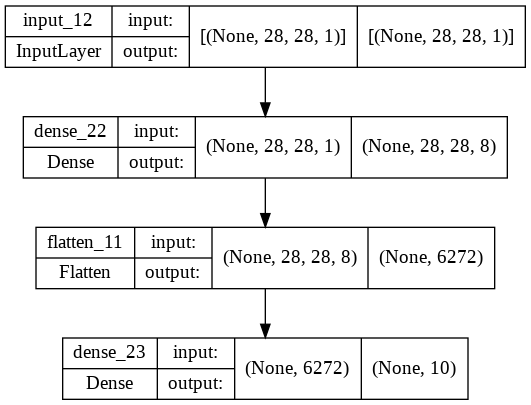

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)